## To predict the geographical origin of music

Overview
The quesion that we are looking at, is weather the geographical origin of songs can be predicted based on different audio features. The data can be downloaded at http://archive.ics.uci.edu/ml/datasets/geographical+original+of+music#.

***Data Exploaration***


The dataset consists of audio features that were extracted using MARSYAS. The features that we are using can be seen as the key audio features of a song. We need to predict the geographical region of a song based on these features. The data does not include geographical regions, but rather lattitudanal and longitudinal coordinates. We would need to first perform clustering to figure out the geographical region for a set of coordinates.


***Data Preparation***

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


data = pd.read_csv('default_features_1059_tracks.txt',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [2]:
data = np.asarray(data)
data.shape

(1059, 70)

Each row is a song (observation) and each song is an audio feature. However, the last two columns are the geographical coordinates, so we need to split this appropriately.

In [3]:
X = data[:,0:68]
y = data[:,68:70]

print("X sample")
print(X[0,1])
print("")
print("y sample")
print(y[0,0:2])

X sample
7.835325

y sample
[-15.75 -47.95]


In [4]:
print(X.dtype)
print(y.dtype)

float64
float64



Seeing that we need to predict the geographic area, we need to reduce the two coordinate prediction column to a single prediction column. Dimension reduction techniques such as PCA might work, but seeing that we know that there are 33 geographic locations within the data, clustering might be a better approach.

In [5]:
n_clusters = 33
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y)
labels = kmeans.predict(y)

print('Centroids')
centroids = kmeans.cluster_centers_
print(centroids)

Centroids
[[-6.1700e+00  3.5740e+01]
 [ 3.9910e+01  1.1638e+02]
 [ 1.4910e+01 -2.3510e+01]
 [ 4.1710e+01  4.4780e+01]
 [ 4.1900e+01  1.2480e+01]
 [ 2.8610e+01  7.7200e+01]
 [ 1.7980e+01 -7.6800e+01]
 [-6.1700e+00  1.0682e+02]
 [-1.5750e+01 -4.7950e+01]
 [-3.5300e+01  1.4912e+02]
 [ 3.9910e+01  3.2830e+01]
 [ 1.9750e+01  9.6100e+01]
 [ 3.4030e+01 -6.8500e+00]
 [ 1.2650e+01 -8.0000e+00]
 [ 3.5700e+01  1.3971e+02]
 [ 4.1260e+01  6.9210e+01]
 [ 5.2500e+01 -1.2000e-01]
 [ 2.3760e+01  1.2100e+02]
 [ 9.0300e+00  3.8740e+01]
 [ 5.4680e+01  2.5310e+01]
 [ 3.0030e+01  3.1210e+01]
 [ 3.8000e+01  2.3710e+01]
 [ 1.7250e+01 -8.8760e+01]
 [ 3.6700e+01  3.2100e+00]
 [ 1.1550e+01  1.0491e+02]
 [ 3.3660e+01  7.3160e+01]
 [ 3.5680e+01  5.1410e+01]
 [ 1.4660e+01 -1.7410e+01]
 [ 4.2860e+01  7.4600e+01]
 [-1.2600e+00  3.6800e+01]
 [ 4.4410e+01  2.6100e+01]
 [ 1.3750e+01  1.0048e+02]
 [ 4.1330e+01  1.9800e+01]]


<Figure size 432x288 with 0 Axes>

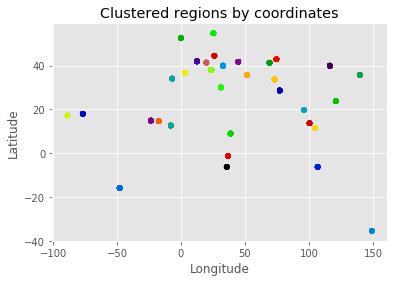

<Figure size 432x288 with 0 Axes>

In [6]:
plt.style.use('ggplot')
label_color = [plt.cm.nipy_spectral(float(l) /n_clusters) for l in labels]
plt.scatter(y[:, 1], y[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

According to the research paper, data was collected from 33 countries/regions. As we can see from the plot above, it seems as if the coordinates provided are identical per region. However, it seems as if some of the geographical regions are closer to each other than others. Even though countries or regions might be divided by borders, it seems logical that some of these geographical regions would be influenced by nearby located regions. This is important to bear in mind. If we are making inaccurate classifications, we might want to see whether the prediction is a nearby region. If this is the case, we should consider reducing the number of clusters.

In [7]:
y = labels

Since we do not know exactly what each feature means and what the range is of each feature, it would be a good idea to scale the X data. This will prevent estimators that are influenced by the dimensionality of the feature space to be influenced too much by variables that have wider ranges than others.

In [8]:
from sklearn.preprocessing import StandardScaler

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

X_scaler = StandardScaler().fit(X)

scaled_Xtrain = X_scaler.transform(Xtrain)
scaled_Xtest = X_scaler.transform(Xtest)

In [9]:

PCA_var = PCA(n_components = X_scaler.transform(X).shape[1])
PCA_var.fit(X_scaler.transform(X))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)
PCA_var_exp

[0,
 0.8000745533496415,
 0.8814716502567665,
 0.9229508995216814,
 0.9300103808603691,
 0.9440686173702931,
 0.9668358489879662,
 0.9693313450981565,
 0.9725077214562596,
 0.974797006111117,
 0.978256036201096,
 0.9794688109312614,
 0.9808428796405897,
 0.9815410686383625,
 0.983630444267057,
 0.9852143083977548,
 0.9856822071186979,
 0.9861335253200437,
 0.9864134915037723,
 0.9875870247427453,
 0.9880846639064016,
 0.9883096776260321,
 0.9897557938258842,
 0.9906676802920289,
 0.9909251441467753,
 0.9915846690366814,
 0.992103889605993,
 0.9927204266669851,
 0.9929025722395827,
 0.993122080854974,
 0.993367006893402,
 0.9935184349856202,
 0.9938402695562611,
 0.9940729115800395,
 0.9941986618406444,
 0.9947298507037402,
 0.9950664913296224,
 0.9954370430710876,
 0.9958055962739443,
 0.9958589638102417,
 0.9960242328067319,
 0.996458597585607,
 0.9967775997421923,
 0.9969602917885826,
 0.9970432543657372,
 0.9971764583448536,
 0.9972878010314817,
 0.9974061204340178,
 0.9974530329546

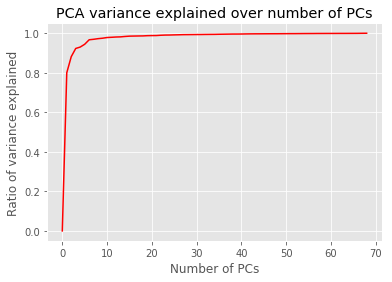

In [10]:
plt.figure()
plt.title("PCA variance explained over number of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Ratio of variance explained")
plt.plot(range(0, len(PCA_var_exp), 1), PCA_var_exp, c = 'r')
plt.show()

***Feature selection***


We have 68 features, but we have no idea whether all the features are relevant or not.

We can use Python's RFE function to perform backward selection and the PCA function to reduce dimensionality by minimising the lost variance.

With PCA we can determine the amount of variance lost as the dimensions are reduced, but for RFE we need an estimator to determine whether omitting a feature will result in a decrease in accuracy score or not. To keep our measurement metrics consistent, we will rather test the reduced dimensionalty of PCA in terms of accuracy when using different estimators.

For this reason, we need an estimator to validate the feature selection. We can test RFE and PCA with a variety of estimators and compare the different feature selection results between the models.

However, because we do not yet know which features to use, it is difficult to know what our hyperparameter values should be for our models. To make sure that we aren't making any assumptions in terms of which hyperparameters work best, we will apply grid search for each feature selection iteration. We can then use the best accuracy obtained for a specific number of features for each estimator.

The problem on hand is a classification problem, which limits the type of estimators we can use. We will be considering the following estimators - random forest, SVM (SVC) with a linear kernel and Logistic Regression. K-nearestneighbours is another possible estimator, but because it does not perform well in high dimensionality, it will not be included during the feature selection process.

Each estimator that is being used, is being trained on training data, and validated using an independent data subset.

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


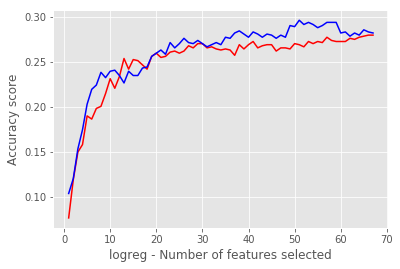

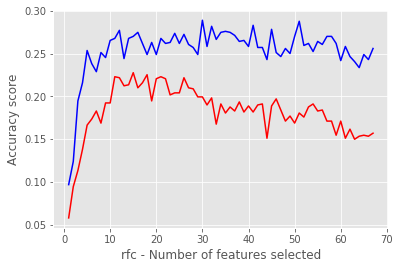

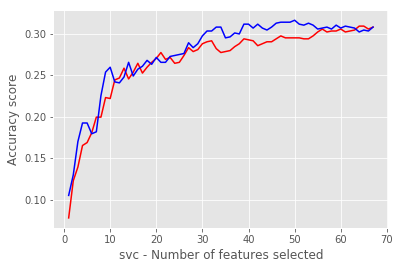

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

estimators = {}

estimators['svc'] = SVC
estimators['rfc'] = RandomForestClassifier
estimators['logreg'] = LogisticRegression

params = {}
params['svc'] = {'kernel': ['linear'], 'C': [10**x for x in range(-1, 3, 1)], 
                 'gamma': [10**x for x in range(-1, 2, 1)], 
                'random_state': [1234]}
params['rfc'] = {'n_estimators': [5*x for x in range(3, 5, 1)]}

params['logreg'] = {'C': [10**x for x in range(-1, 3, 1)], 'penalty': ['l1', 'l2']}

rfe_best_model = {}
pca_best_model = {}

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    rfe_best_model[estimator] = []
    pca_best_model[estimator] = []
    
    for n_comps in range(1, scaled_Xtrain.shape[1], 1):
        rfe_best_model[estimator].append(0)
        pca_best_model[estimator].append(0)
            
        for params_combo in grid:
        
            estimator_iter = estimators[estimator]
            estimator_iter = estimator_iter(**params_combo)

            rfe = RFE(estimator = estimator_iter, n_features_to_select=n_comps)
            rfe.fit(scaled_Xtrain, ytrain)

            if (rfe.score(scaled_Xtest, ytest) > rfe_best_model[estimator][n_comps - 1]):
                rfe_best_model[estimator][n_comps - 1] = rfe.score(scaled_Xtest, ytest)
                
            PCA_model = PCA(n_components = n_comps)
            PCA_model.fit(scaled_Xtrain)
            PCA_Xtrain = PCA_model.transform(scaled_Xtrain)
            PCA_Xtest = PCA_model.transform(scaled_Xtest)
            
            estimator_iter.fit(PCA_Xtrain, ytrain)
            
            if (estimator_iter.score(PCA_Xtest, ytest) > pca_best_model[estimator][n_comps - 1]):
                pca_best_model[estimator][n_comps - 1] = estimator_iter.score(PCA_Xtest, ytest)

    plt.figure()
    plt.xlabel("%s - Number of features selected" % estimator)
    plt.ylabel("Accuracy score")
    plt.plot(range(1, len(pca_best_model[estimator]) + 1, 1), pca_best_model[estimator], c = 'r')
    plt.plot(range(1, len(rfe_best_model[estimator]) + 1, 1), rfe_best_model[estimator], c = 'b')
    plt.show()


The red lines represent the PCA dimension reduction and the blue lines represent RFE for the different estimators used.

It would seem as if backward selection (RFE) is giving us higher accuracy scores than PCA in general. All the plots seem to level out around models containing 10 features. For this reason, we will select the 10 best features according to backward selection and build our model on this. The additional features are not adding a lot of value.

In [13]:
rfe_best_model_2 = {}
pca_best_model_2 = {}

rfe_best_model_2['svc'] = []
rfe_best_model_2['rfc'] = []
rfe_best_model_2['logreg'] = []

accuracies = {}

accuracies['svc'] = [0]
accuracies['rfc'] = [0]
accuracies['logreg'] = [0]

features = {}

features['svc'] = []
features['rfc'] = []
features['logreg'] = []

estimator_list = []

n_comps = 10
                          
for i, estimator in enumerate(estimators):
    
    estimator_list.append(estimator)
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    rfe_best_model_2[estimator] = []
    
    rfe_best_model_2[estimator].append(0)
    #pca_best_model_2[estimator].append(0)

    for params_combo in grid:
        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)

        rfe = RFE(estimator = estimator_iter, n_features_to_select=n_comps)
        rfe.fit(scaled_Xtrain, ytrain)

        if (rfe.score(scaled_Xtest, ytest) > accuracies[estimator][0]):
            accuracies[estimator][0] = [rfe.score(scaled_Xtest, ytest)]
            features[estimator] = rfe.support_

In [14]:
import pandas as pd

est_columns = ['SVC','RFC','Log_Reg'] 
est_index = ['feature_%d'%i for i in range(0,len(features['svc']))]

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
est_df = pd.DataFrame(index=est_index, columns=est_columns)
est_df

for i in range(0, len(features['svc'])):
    est_df.iloc[i, 0] = features['svc'][i]
    est_df.iloc[i, 1] = features['rfc'][i]
    est_df.iloc[i, 2] = features['logreg'][i]
    
print('Features used by any Estimator')
est_df[est_df['SVC'] | est_df['RFC'] | est_df['Log_Reg']]

Features used by any Estimator


,SVC,RFC,Log_Reg
feature_3,False,False,True
feature_4,True,False,False
feature_7,True,True,False
feature_8,True,True,False
feature_20,True,True,True
feature_22,False,False,True
feature_26,True,False,False
feature_34,False,False,True
feature_35,False,True,True
feature_36,False,True,False


In [15]:

print('Features used by all Estimators' )
est_df[est_df['SVC'] & est_df['RFC'] & est_df['Log_Reg']]

Features used by all Estimators


,SVC,RFC,Log_Reg
feature_20,True,True,True
feature_52,True,True,True


In [16]:
from sklearn.feature_selection import RFE

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

rfc = RandomForestClassifier(n_estimators=35)

rfe = RFE(estimator = rfc, n_features_to_select=10)
rfe.fit(Xtrain, ytrain)
X_reduced = rfe.transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, test_size=0.8, random_state=1234)

In [17]:
X_reduced.shape

(1059, 10)

# Model Building

We can now use this these features to test out the same estimators and include k nearest neighbours.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

estimators = {}

estimators['svc'] = SVC
estimators['rfc'] = RandomForestClassifier
estimators['knn'] = KNeighborsClassifier
# estimators['logreg'] = LogisticRegression

params = {}
params['svc'] = {'kernel': ['linear'], 'C': [10**x for x in range(-2, 3, 1)], 
                 'gamma': [10**x for x in range(-2, 3, 1)], 
                'random_state': [1234]}
params['rfc'] = {'n_estimators': [5*x for x in range(1, 8, 1)]}

params['knn'] = {'n_neighbors': range(1, 15, 1), 'p': [1, 2]}
# params['logreg'] = {'C': [10**x for x in range(-1, 3, 1)], 'penalty': ['l1', 'l2']}

best_model = {}

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    best_model[estimator] = [0]
    
    for params_combo in grid:
        
        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)
            
        estimator_iter.fit(Xtrain, ytrain)
        scores = cross_val_score(estimator_iter, Xtrain, ytrain, cv = 2, scoring='accuracy') # smallest class has 2 members
        
        if (scores.mean() > best_model[estimator][0]):
            best_model[estimator] = [scores.mean(), estimator_iter.get_params]

    print("For %s the best cv accuracy score is %s" % (estimator, best_model[estimator][0]))

For rfc the best cv accuracy score is 0.285449448363176
For svc the best cv accuracy score is 0.2949900524507144
For knn the best cv accuracy score is 0.32207451618737565


# Reclustering


The cross validation scores for the differernt models are fairly similar, but all of them are really low. Due to this reason, it might be a good idea use clustering to re-assign the classification groups. Seeing that the initial problem relates to geographic locations, we have to apply clustering based on the coordinates of the region. It would be fair to say that the US and Australia listens to similar types of music, but then we will be predicting music types instead of regions. For now, let's group by geographic locations.

We can apply each of the models above to different number of clusters to see if our accuracy improves.

In [19]:
data = pd.read_csv('default_features_1059_tracks.txt',header=None)
    
data = np.asarray(data)
data.shape

y_coords = data[:, 68:70]
y_coords = y_coords.astype(dtype = np.float)

n_clusters = range(2, 33, 1)

accuracies = {'svc':[], 'rfc':[], 'knn':[]}

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, max_iter = 300, algorithm='full')
    kmeans = kmeans.fit(y_coords)
    labels = kmeans.predict(y_coords)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, labels, test_size=0.8, random_state=1234)

    best_model = {}

    for i, estimator in enumerate(estimators):
        model_params = ParameterGrid(params[estimator])
        grid = model_params

        best_model[estimator] = [0]
        #accuracies[estimator] = []

        for params_combo in grid:

            estimator_iter = estimators[estimator]
            estimator_iter = estimator_iter(**params_combo)

            #estimator_iter.fit(Xtrain, ytrain)
            scores = cross_val_score(estimator_iter, Xtrain, ytrain, cv = 2, scoring='accuracy') # smallest class has 2 members

            if (scores.mean() > best_model[estimator][0]):
                best_model[estimator] = [scores.mean(), estimator_iter.get_params]

        accuracies[estimator].append(best_model[estimator][0])

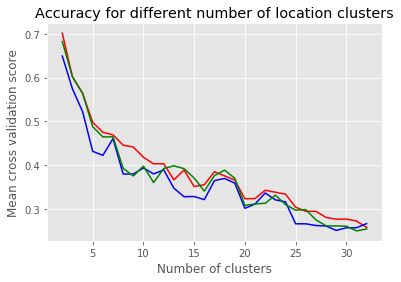

In [20]:
plt.figure()
plt.xlabel("Number of clusters")
plt.ylabel("Mean cross validation score")
plt.title("Accuracy for different number of location clusters")
plt.plot(range(2, len(accuracies['knn']) + 2),accuracies['knn'], c = 'r')
plt.plot(range(2, len(accuracies['svc']) + 2),accuracies['svc'], c = 'b')
plt.plot(range(2, len(accuracies['rfc']) + 2),accuracies['rfc'], c = 'g')
plt.show()

The plot shows that the accuracy decreases exponentially as the number of coordinate clusters increase. This is understandable, because it is more likely of randomly predicting the correct cluster if there are only a few clusters to choose from. The elbow of the curves above is around 7 clusters. No penalty score has been added, which makes it understandable that the slopes continues to decrease after this.

Given the above plot, it would be a good idea to visualise the above three models at 5 neighbours on a coordinate scatterplot.

We can view the coordinates for 5 clusters to see if it makes sense.

<Figure size 432x288 with 0 Axes>

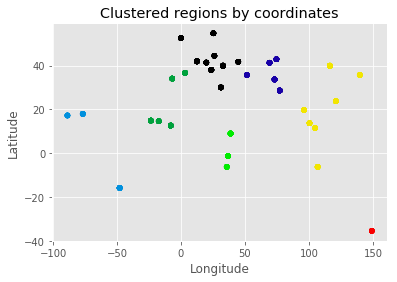

<Figure size 432x288 with 0 Axes>

In [21]:
data = pd.read_csv('default_features_1059_tracks.txt',header=None)
    
data = np.asarray(data)
data.shape

y_coords = data[:, 68:70]
y_coords = y_coords.astype(dtype = np.float)

n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y_coords)
labels = kmeans.predict(y_coords)


centroids = kmeans.cluster_centers_


plt.style.use('ggplot')
label_color = [plt.cm.nipy_spectral(float(l) /n_clusters) for l in labels]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [22]:
best_model

{'knn': [0.2575963103635377,
  <bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=1, p=1,
             weights='uniform')>],
 'rfc': [0.25397901971423403,
  <bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)>],
 'svc': [0.2663682401880991,
  <bound method BaseEstimator.get_params of SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random

In [23]:
n_clusters = 7

accuracies = {'svc':[], 'rfc':[], 'knn':[]}

kmeans = KMeans(n_clusters=n_clusters, max_iter = 300, algorithm='full')
kmeans = kmeans.fit(y_coords)
labels = kmeans.predict(y_coords)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, labels, test_size=0.8, random_state=1234)

best_model = {}

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params

    best_model[estimator] = [0]
    
    for params_combo in grid:

        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)
        estimator_iter.fit(Xtrain, ytrain)
        #estimator_iter.fit(Xtrain, ytrain)
        scores = cross_val_score(estimator_iter, Xtest, ytest, cv = 2, scoring='accuracy') # smallest class has 2 members

        if (scores.mean() > best_model[estimator][0]):
            best_model[estimator] = [scores.mean(), estimator_iter.get_params, estimator_iter.predict(Xtest)]
            best_model[estimator].append(params_combo)

    accuracies[estimator].append(best_model[estimator][0])

In [24]:
acc_index = ['Accuracy Score', 'parameters', 'parameter values'] 
acc_columns = ['SVC', 'Random Forest', 'KNN']

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
acc_df = pd.DataFrame(index=acc_index, columns=acc_columns)


acc_df.iloc[0, 0] = best_model['svc'][0]
acc_df.iloc[0, 1] = best_model['rfc'][0]
acc_df.iloc[0, 2] = best_model['knn'][0]
acc_df.iloc[1, 0] = list(best_model['svc'][3])
acc_df.iloc[1, 1] = list(best_model['rfc'][3])
acc_df.iloc[1, 2] = list(best_model['knn'][3])
acc_df.iloc[2, 0] = list(best_model['svc'][3].values())
acc_df.iloc[2, 1] = list(best_model['rfc'][3].values())
acc_df.iloc[2, 2] = list(best_model['knn'][3].values())

In [25]:
acc_df

,SVC,Random Forest,KNN
Accuracy Score,0.4446,0.4634,0.4611
parameters,"[random_state, kernel, gamma, C]",[n_estimators],"[n_neighbors, p]"
parameter values,"[1234, linear, 0.01, 100]",[25],"[4, 1]"


<Figure size 432x288 with 0 Axes>

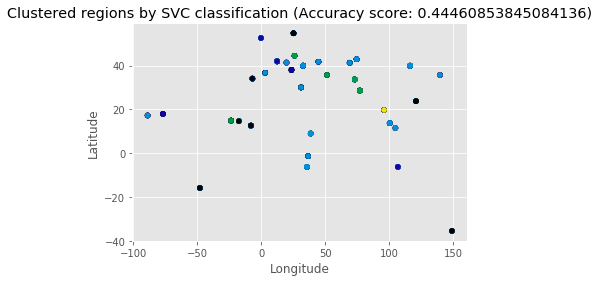

<Figure size 432x288 with 0 Axes>

In [26]:
plt.style.use('ggplot')
label_color = [plt.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['svc'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by SVC classification (Accuracy score: %s)" % best_model['svc'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

<Figure size 432x288 with 0 Axes>

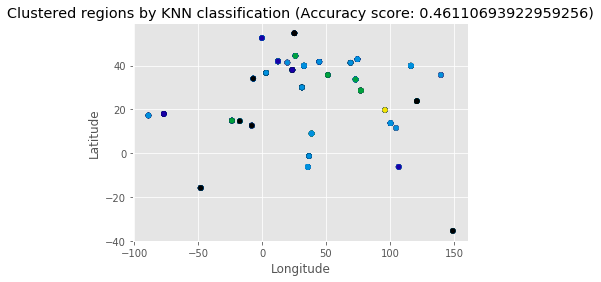

<Figure size 432x288 with 0 Axes>

In [27]:

plt.style.use('ggplot')
label_colorlabel_col  = [plt.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['knn'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by KNN classification (Accuracy score: %s)" % best_model['knn'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

<Figure size 432x288 with 0 Axes>

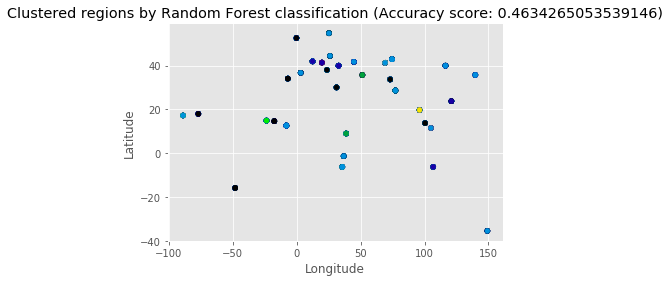

<Figure size 432x288 with 0 Axes>

In [28]:
plt.style.use('ggplot')
label_color = [plt.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['rfc'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by Random Forest classification (Accuracy score: %s)" % best_model['rfc'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()


After applying our the best hyperparameters to each of the three models, we were still not could still not reach 50% accuracy for classifying music by geographic location, even after we reduced the number of cluster to 7.

Random Forest Classification did marginally better than the other two models with an accuracy score of 46.3% when considering 7 geographical clusters.

Geographically the coordinate plot above makes more or less sense. Kmeans have roughly clustered different continents together. There are a few points that might not be in the correct geographic cluster, but it makes sense to cluster as above.

The second plot shows clustering according to music features. Even though the colours do not seem to be matching the cluster colours on the on the coordinate clustering plot, it would appear as if the second plot is somewhat clustered by geographic location. However, it is difficult to measure this accuracy by only looking at the plot.

In [29]:
results_columns = ['Geo', 'SVC','RFC','KNN'] 
results_index = ['obs_%d'%i for i in range(0,len(best_model['svc'][2]))]

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
results_df = pd.DataFrame(index=results_index, columns=results_columns)


for i in range(0, len(best_model['svc'][2])):
    results_df.iloc[i, 0] = ytest[i]
    results_df.iloc[i, 1] = best_model['svc'][2][i]
    results_df.iloc[i, 2] = best_model['rfc'][2][i]
    results_df.iloc[i, 3] = best_model['knn'][2][i]
    
correct_columns = ['SVC', 'RFC', 'KNN']
correct_index = ['Correct', 'Incorrect']

pd.options.display.float_format = '{:,.4g}'.format
correct_df = pd.DataFrame(index=correct_index, columns=correct_columns)
correct_df

for i in range(0, 3, 1):
    correct_df.iloc[0, i] = len(results_df[results_df['Geo'] == results_df.iloc[:, i+1]])
    correct_df.iloc[1, i] = len(results_df[results_df['Geo'] != results_df.iloc[:, i+1]])
    
correct_df


,SVC,RFC,KNN
Correct,309,369,362
Incorrect,539,479,486
